In [6]:
import pandas as pd

# Load data
file_path = '../llama_consistency/llama_scores_2.csv'
data = pd.read_csv(file_path)

# Melt the DataFrame
melted_data = pd.melt(
    data,
    id_vars=[data.columns[0]], 
    var_name='Seed',            
    value_name='Score'         
)

# Display the melted DataFrame
print(melted_data)


                                                 title   Seed  Score
0    Repeated Exercise Induces Release of Soluble P...     42      2
1    Should Claudicants Receive Angioplasty or Exer...     42      1
2    Intermittent claudication should not be treate...     42      0
3    Interferon therapy reduces the risk for hepato...     42      0
4    Treatment of chronic hepatitis C virus infecti...     42      1
..                                                 ...    ...    ...
975  Assessment and management of acute pain in hig...  39517      0
976  DAILY COST PREDICTION MODEL IN NEONATAL INTENS...  39517      0
977  Impact of bronchopulmonary dysplasia, brain in...  39517      1
978  Indomethacin for asymptomatic patent ductus ar...  39517      1
979  Management of Patent Ductus Arteriosus in Very...  39517      1

[980 rows x 3 columns]


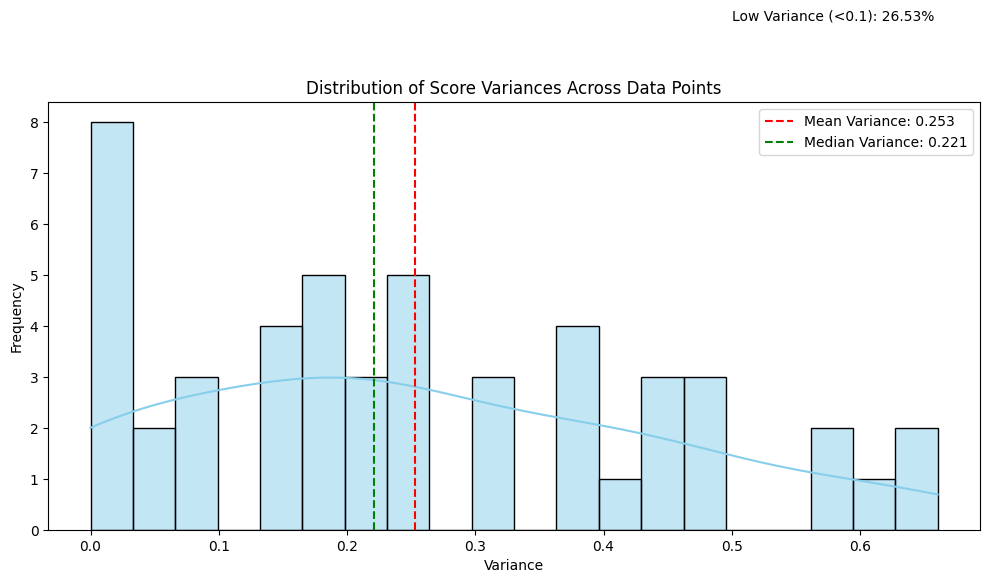

                       Metric     Value
0               Mean Variance  0.252846
1             Median Variance  0.221053
2                Min Variance       0.0
3                Max Variance  0.660526
4  Proportion of Low Variance    26.53%
5         Low Variance Points        13
6        High Variance Points         5


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute variance for each data point
variance_data = melted_data.groupby(melted_data.columns[0])['Score'].var()

# Compute descriptive statistics
mean_variance = variance_data.mean()
median_variance = variance_data.median()
min_variance = variance_data.min()
max_variance = variance_data.max()
low_variance_threshold = 0.1
low_variance_proportion = (variance_data < low_variance_threshold).mean() * 100

# Plot histogram with annotations
plt.figure(figsize=(10, 6))
sns.histplot(variance_data, bins=20, kde=True, color='skyblue')

# Add mean and median lines
plt.axvline(mean_variance, color='red', linestyle='--', label=f'Mean Variance: {mean_variance:.3f}')
plt.axvline(median_variance, color='green', linestyle='--', label=f'Median Variance: {median_variance:.3f}')

# Annotate proportion of low variance
plt.text(0.5, 10, f"Low Variance (<{low_variance_threshold}): {low_variance_proportion:.2f}%", fontsize=10)

plt.title('Distribution of Score Variances Across Data Points')
plt.xlabel('Variance')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

# Identify data points with low and high variance
low_variance_points = variance_data[variance_data < low_variance_threshold].count()
high_variance_points = variance_data[variance_data > 0.5].count()


# Create a summary DataFrame
summary = pd.DataFrame({
    'Metric': ['Mean Variance', 'Median Variance', 'Min Variance', 'Max Variance',
               'Proportion of Low Variance', 'Low Variance Points', 'High Variance Points'],
    'Value': [mean_variance, median_variance, min_variance, max_variance,
              f"{low_variance_proportion:.2f}%", low_variance_points, high_variance_points]
})

# Display the table
print(summary)


In [8]:
import numpy as np

# Step 1: Filter high-variance data points
high_variance_threshold = 0.5
high_variance_points = variance_data[variance_data > high_variance_threshold].index

# Step 2: Extract scores for high-variance data points
high_variance_scores = melted_data[melted_data[melted_data.columns[0]].isin(high_variance_points)]

# Step 3: Group by each data point and calculate transitions
total_transitions = 0
total_0_to_2_transitions = 0
total_2_to_0_transitions = 0

for data_point in high_variance_points:
    # Get scores for the data point
    scores = high_variance_scores[high_variance_scores[melted_data.columns[0]] == data_point]['Score'].values
    
    # Calculate consecutive transitions
    transitions = list(zip(scores[:-1], scores[1:]))
    total_transitions += len(transitions)
    
    # Count 0->2 and 2->0 transitions
    total_0_to_2_transitions += transitions.count((0, 2))
    total_2_to_0_transitions += transitions.count((2, 0))

# Step 4: Compute percentages
percent_0_to_2 = (total_0_to_2_transitions / total_transitions) * 100 if total_transitions > 0 else 0
percent_2_to_0 = (total_2_to_0_transitions / total_transitions) * 100 if total_transitions > 0 else 0

# Print results
print(f"Total Transitions: {total_transitions}")
print(f"Total 0-to-2 Transitions: {total_0_to_2_transitions}")
print(f"Percent 0-to-2 Transitions: {percent_0_to_2:.2f}%")

# across all seeds

Total Transitions: 95
Total 0-to-2 Transitions: 7
Percent 0-to-2 Transitions: 7.37%


In [1]:
import pandas as pd

# Load data
file_path = '../llama_consistency/llama_scores_2.csv'  # Update the file path if needed
data = pd.read_csv(file_path)

# Normalize text function
def normalize_text(text):
    return " ".join(text.lower().strip().split()) if isinstance(text, str) else text

# Normalize dataset titles
data[data.columns[0]] = data[data.columns[0]].apply(normalize_text)

# Titles provided
titles = [
    "Interferon therapy reduces the risk for hepatocellular carcinoma",
    "Treatment of chronic hepatitis C virus infection in patients with cirrhosis",
    "Effect of interferon therapy on the incidence of hepatocellular carcinoma and mortality of patients with chronic hepatitis C: A retrospective cohort study of 738 patients",
    "Hepatitis C virus related cirrhosis: time to occurrence of hepatocellular carcinoma and death",
    "Hepatocellular carcinoma in patients with HCV",
    "Antiviral therapy of HBV- and HCV-induced liver cirrhosis",
    "PEGINTERFERON ALFA-2a IN PATIENTS WITH CHRONIC HEPATITIS C AND CIRRHOSIS",
    "Antiviral Therapy for Patients with Chronic Hepatitis C",
    "Peginterferon alfa-2a (40 kDa) monotherapy: a novel agent for chronic hepatitis C therapy",
    "Therapeutic advances in the management of hepatitis B and hepatitis C",
    "Impact of interferon therapy on the natural history of hepatitis C virus related cirrhosis",
    "Effect of interferon therapy on the development of hepatocellular carcinoma in patients with hepatitis C virus‐related cirrhosis: a meta‐analysis",
    "Long‐term interferon therapy for 1 year or longer reduces the hepatocellular carcinogenesis rate in patients with liver cirrhosis caused by hepatitis C virus: A pilot study",
    "Meta‐analysis of interferon randomized trials in the treatment of viral hepatitis C in naive patients: 1999 Update",
    "An emerging role for interferon in haemophiliacs with chronic hepatitis C?",
    "Cost-effectiveness of adjuvant interferon therapy after surgical resection of Hepatitis C-related hepatocellular carcinoma",
    "Effect of hepatitis B and C virus infections on the natural history of compensated cirrhosis: a cohort study of 297 patients",
    "Hepatocellular carcinoma and hepatitis C in the United States",
    "Interferon therapy prolonged life expectancy among chronic hepatitis C patients",
    "Treatment of Hepatitis C Virus Genotype 4–Related Cirrhosis: Ribavirin and Interferon Combination Compared With Interferon Alone",
    "Interferon for interferon naive patients with chronic hepatitis C",
    "The in vivo apoptotic effect of interferon alfa‐2b on rat preneoplastic liver involves Bax protein",
    "Assessment of therapeutic benefit of antiviral therapy in chronic hepatitis C: is hepatic venous pressure gradient a better end point?",
    "Interferon for Decreasing the Incidence of Hepatocellular Carcinoma in Patients with Chronic Hepatitis C",
    "Hepatitis C: Who Should You Treat and How?",
    "Plasma brain natriuretic peptide as a predictor of haemodynamically significant patent ductus arteriosus in preterm infants",
    "Poor outcome of very low birthweight babies with serious congenital heart disease",
    "Evaluating 'old' definitions for the 'new' bronchopulmonary dysplasia",
    "Evidence-based neonatology: making a difference beyond discharge from the neonatal nursery",
    "The management of chronic lung disease",
    "Treating extremely low birthweight infants with prophylactic indomethacin",
    "Bipolar affective disorder—left out in the cold",
    "Measuring functional outcomes after prematurity: developmental impact of very low birth weight and extremely low birth weight status on childhood disability",
    "Preterm outcomes research: a critical component of neonatal intensive care",
    "Comparison of ibuprofen and indomethacin therapy for patent ductus arteriosus in preterm infants",
    "Resolving our uncertainty about oxygen therapy",
    "Prophylactic indomethacin for preterm infants: a systematic review and meta-analysis",
    "Effect of early targeted indomethacin on the ductus arteriosus and blood flow to the upper body and brain in the preterm infant",
    "Do we need another NSAID instead of indomethacin for treatment of ductus arteriosus in preterm infants?",
    "Randomized trial of prolonged low-dose versus conventional-dose indomethacin for treating patent ductus arteriosus in very low birth weight infants",
    "Hemodynamic and antecedent risk factors of early and late periventricular/intraventricular hemorrhage in premature infants",
    "Risk factors for intraventricular hemorrhage in very low birth weight premature infants: a retrospective case-control study",
    "Evaluation and development of potentially better practices for the prevention of brain hemorrhage and ischemic brain injury in very low birth weight infants",
    "Assessment and management of acute pain in high-risk neonates",
    "DAILY COST PREDICTION MODEL IN NEONATAL INTENSIVE CARE",
    "Impact of bronchopulmonary dysplasia, brain injury, and severe retinopathy on the outcome of extremely low-birth-weight infants at 18 months: results from the trial of indomethacin prophylaxis in preterms",
    "Indomethacin for asymptomatic patent ductus arteriosus in preterm infants",
    "Management of Patent Ductus Arteriosus in Very Preterm Infants in the Post-surfactant Era",
    "Repeated Exercise Induces Release of Soluble P-Selectin in Patients with Intermittent Claudication",
    "Should Claudicants Receive Angioplasty or Exercise Training?",
    "Intermittent claudication should not be treated by surgery"
]

normalized_titles = [normalize_text(title) for title in titles]

# Melt the DataFrame to long format
melted_data = pd.melt(
    data,
    id_vars=[data.columns[0]],  # First column as identifier (normalized titles)
    var_name='Seed',
    value_name='Score'
)

# Compute the majority vote for each title
majority_vote = melted_data.groupby(melted_data.columns[0])['Score'].agg(lambda x: x.mode()[0]).reset_index()
majority_vote.columns = [melted_data.columns[0], 'Majority Vote']

# Function to get majority votes without fuzzy matching
def get_majority_votes_exact(titles_list):
    results = majority_vote[majority_vote[melted_data.columns[0]].isin(titles_list)]
    return results.set_index(melted_data.columns[0])['Majority Vote'].to_dict()

# Get majority votes with exact matching
majority_votes_dict = get_majority_votes_exact(normalized_titles)

# Extract majority votes in the same order as the input titles
list_mv = [majority_votes_dict.get(title, None) for title in normalized_titles]


# Print the length of the results list
print("\nTotal Titles Matched:", len(list_mv))


Total Titles Matched: 51


In [2]:
print(list_mv)

[0, 1, 2, 0, 0, 0, 2, 0, 1, 0, 2, 1, 2, 0, 1, 2, 0, 0, 2, 2, 1, 0, 0, 2, 2, 1, 1, 1, 0, 0, 2, 0, 1, 1, 1, 0, 0, 2, 1, 2, 1, 1, 1, 0, 0, 2, 1, 0, 1, 1, 1]


In [3]:
from sklearn.metrics import cohen_kappa_score
import numpy as np

# Given lists
llm2 = [0, 1, 2, 0, 0, 0, 2, 0, 1, 0, 2, 1, 2, 0, 1, 2, 0, 0, 2, 2, 1, 0, 0, 2, 2, 1, 1, 1, 0, 0, 2, 0, 1, 1, 1, 0, 0, 2, 1, 2, 1, 1, 1, 0, 0, 2, 1, 0, 1, 1, 1]

llm = [
    0,
1,
2,
0,
0,
1,
2,
0,
1,
0,
2,
1,
2,
0,
1,
1,
0,
0,
2,
1,
1,
0,
0,
2,
2,
0,
0,
1,
0,
0,
1,
0,
1,
1,
1,
0,
0,
2,
1,
2,
1,
1,
1,
0,
0,
2,
0,
0,
2,
1,
0,
]
expert = [0, 0, 1, 0, 0, 0,2,0,0,0,2,0,0,0,0,2,0,
0,
2,
2,
0,
1,
0,
0,
0,
1,
1,
0,
0,
0,
0,
0,
1,
0,
2,
0,
0,
2,
0,
2,
1,
1,
1,
0,
1,
2,
0,
0,
2,
0,
0]


# Compute Cohen’s Kappa
kappa = cohen_kappa_score(llm2, expert)
print(f"Cohen's Kappa: {kappa:.3f}")

# Compute Percentage Agreement
agreement = np.sum(np.array(llm2) == np.array(expert)) / len(llm2)
print(f"Percentage Agreement: {agreement * 100:.2f}%")


Cohen's Kappa: 0.397
Percentage Agreement: 60.78%


In [4]:
list(df['LLM']) == llm2

False

In [4]:
import pandas as pd
import numpy as np
from sklearn.metrics import cohen_kappa_score, accuracy_score
from statsmodels.stats.inter_rater import fleiss_kappa
from scipy.stats import spearmanr, kendalltau

# Load CSV
file_path = "../llama_consistency_logs/llm_experts_v2.csv"
df = pd.read_csv(file_path)
df['llm_mv'] = list_mv
# Extract expert columns
expert_cols = ['expert1', 'expert2', 'expert3']

# Compute Majority Vote (Handles ties by selecting the lowest value)
df['majority_vote'] = df[expert_cols].mode(axis=1)[0]

# Use 'llm_mv' column for LLM predictions
llm_col = 'llm_mv'
df[llm_col] = df[llm_col].astype(int)

# Check data consistency
print("First few rows of the dataset:")
print(df[['LLM', 'llm_mv', 'expert1', 'expert2', 'expert3', 'majority_vote']].head())

# 1. Compute Cohen’s Kappa (LLM vs. each expert)
for expert in expert_cols:
    kappa = cohen_kappa_score(df[llm_col], df[expert])
    agreement = np.mean(df[llm_col] == df[expert]) * 100  # Percentage Agreement
    print(f"Cohen's Kappa between LLM and {expert}: {kappa:.3f}")
    print(f"Percentage Agreement between LLM and {expert}: {agreement:.2f}%")

# 2. Compute Cohen’s Kappa & Percentage Agreement (LLM vs. Majority Vote)
kappa_majority = cohen_kappa_score(df[llm_col], df['majority_vote'])
agreement_majority = np.mean(df[llm_col] == df['majority_vote']) * 100
print(f"Cohen's Kappa between LLM and Majority Vote: {kappa_majority:.3f}")
print(f"Percentage Agreement between LLM and Majority Vote: {agreement_majority:.2f}%")

# 3. Compute Cohen’s Kappa & Percentage Agreement (Expert vs. Majority Vote)
for expert in expert_cols:
    kappa_expert_mv = cohen_kappa_score(df[expert], df['majority_vote'])
    agreement_expert_mv = np.mean(df[expert] == df['majority_vote']) * 100
    print(f"Cohen's Kappa between {expert} and Majority Vote: {kappa_expert_mv:.3f}")
    print(f"Percentage Agreement between {expert} and Majority Vote: {agreement_expert_mv:.2f}%")

# 4. Compute pairwise Cohen’s Kappa between experts
for i in range(len(expert_cols)):
    for j in range(i + 1, len(expert_cols)):
        kappa = cohen_kappa_score(df[expert_cols[i]], df[expert_cols[j]])
        print(f"Cohen's Kappa between {expert_cols[i]} and {expert_cols[j]}: {kappa:.3f}")


First few rows of the dataset:
   LLM  llm_mv  expert1  expert2  expert3  majority_vote
0    0       0        0        1        0            0.0
1    1       1        0        2        2            2.0
2    2       2        1        2        1            1.0
3    0       0        0        0        0            0.0
4    0       0        0        2        0            0.0
Cohen's Kappa between LLM and expert1: 0.521
Percentage Agreement between LLM and expert1: 68.63%
Cohen's Kappa between LLM and expert2: 0.382
Percentage Agreement between LLM and expert2: 58.82%
Cohen's Kappa between LLM and expert3: 0.384
Percentage Agreement between LLM and expert3: 60.78%
Cohen's Kappa between LLM and Majority Vote: 0.459
Percentage Agreement between LLM and Majority Vote: 64.71%
Cohen's Kappa between expert1 and Majority Vote: 0.845
Percentage Agreement between expert1 and Majority Vote: 90.20%
Cohen's Kappa between expert2 and Majority Vote: 0.638
Percentage Agreement between expert2 and Majority 

In [7]:
import numpy as np

# Cohen's Kappa values and percentage agreements for LLM vs Experts
kappa_values = np.array([0.521, 0.382, 0.384])
percentage_values = np.array([68.63, 58.82, 60.78])


# Calculate mean and standard deviation for LLM vs Experts
kappa_mean = np.mean(kappa_values)
kappa_std = np.std(kappa_values)
percentage_mean = np.mean(percentage_values)
percentage_std = np.std(percentage_values)

import numpy as np

# Cohen's Kappa values and percentage agreements for LLM vs Experts
kappa_values = np.array([0.521, 0.382, 0.384])
percentage_values = np.array([68.63, 58.82, 60.78])

# Cohen's Kappa and percentage agreement for LLM vs Majority Vote
kappa_majority = 0.459
percentage_majority = 64.71

# Calculate mean and standard deviation for LLM vs Experts
kappa_mean = np.mean(kappa_values)
kappa_std = np.std(kappa_values)
percentage_mean = np.mean(percentage_values)
percentage_std = np.std(percentage_values)

# Combine with majority vote metrics
all_kappa = np.append(kappa_values, kappa_majority)
all_percentage = np.append(percentage_values, percentage_majority)

# Calculate overall means and standard deviations including the majority vote
overall_kappa_mean = np.mean(all_kappa)
overall_kappa_std = np.std(all_kappa)
overall_percentage_mean = np.mean(all_percentage)
overall_percentage_std = np.std(all_percentage)

# Cohen's Kappa values for expert pairs
expert_kappa_values = np.array([0.472, 0.382, 0.251])

# Calculate mean and standard deviation for expert agreement
expert_kappa_mean = np.mean(expert_kappa_values)
expert_kappa_std = np.std(expert_kappa_values)

# Print results
print("LLM vs Experts - Kappa: {:.3f} ± {:.3f}".format(kappa_mean, kappa_std))
print("LLM vs Experts - Percentage Agreement: {:.2f}% ± {:.2f}%".format(percentage_mean, percentage_std))
print("Expert Inter-Annotator Agreement - Kappa: {:.3f} ± {:.3f}".format(expert_kappa_mean, expert_kappa_std))



LLM vs Experts - Kappa: 0.429 ± 0.065
LLM vs Experts - Percentage Agreement: 62.74% ± 4.24%
Expert Inter-Annotator Agreement - Kappa: 0.368 ± 0.091


Overall Mean Deviation from Majority Vote: 0.2656862745098039
Overall Std Deviation of Deviations from Majority Vote: 0.1940335527887977


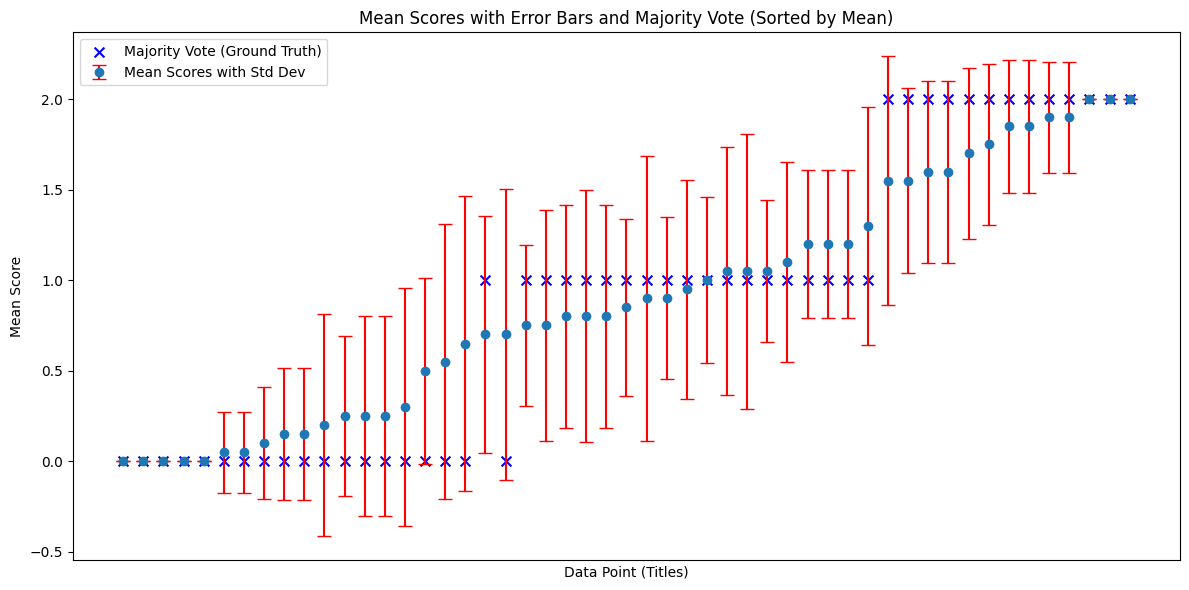

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
file_path = '../llama_consistency_logs/llama_scores_2.csv'
data = pd.read_csv(file_path)

# Melt the DataFrame
melted_data = pd.melt(
    data,
    id_vars=[data.columns[0]], 
    var_name='Seed',            
    value_name='Score'         
)

# Compute mean, standard deviation, and majority vote for each sample
stats_data = melted_data.groupby(melted_data.columns[0])['Score'].agg(['mean', 'std']).reset_index()
majority_vote = melted_data.groupby(melted_data.columns[0])['Score'].agg(lambda x: x.mode()[0]).reset_index()
majority_vote.columns = [melted_data.columns[0], 'Majority Vote']

# Merge stats_data with majority vote
stats_data = stats_data.merge(majority_vote, on=melted_data.columns[0])

# Calculate absolute deviations from the majority vote
melted_data = melted_data.merge(majority_vote, on=melted_data.columns[0])
melted_data['Deviation'] = abs(melted_data['Score'] - melted_data['Majority Vote'])

# Compute mean and standard deviation of deviations for each sample
deviation_stats = melted_data.groupby(melted_data.columns[0])['Deviation'].agg(['mean', 'std']).reset_index()
deviation_stats.columns = [melted_data.columns[0], 'Mean Deviation', 'Std Deviation']

# Aggregate across all samples
overall_mean_deviation = deviation_stats['Mean Deviation'].mean()
overall_std_deviation = deviation_stats['Mean Deviation'].std()

print("Overall Mean Deviation from Majority Vote:", overall_mean_deviation)
print("Overall Std Deviation of Deviations from Majority Vote:", overall_std_deviation)

# Sort and visualize
stats_data_sorted = stats_data.sort_values(by='mean', ascending=True)

plt.figure(figsize=(12, 6))
plt.errorbar(
    stats_data_sorted[melted_data.columns[0]],
    stats_data_sorted['mean'],
    yerr=stats_data_sorted['std'],
    fmt='o',
    ecolor='r',
    capsize=5,
    label='Mean Scores with Std Dev'
)
plt.scatter(
    stats_data_sorted[melted_data.columns[0]],
    stats_data_sorted['Majority Vote'],
    color='blue',
    marker='x',
    s=50,
    label='Majority Vote (Ground Truth)'
)
plt.xticks([], [])
plt.title('Mean Scores with Error Bars and Majority Vote (Sorted by Mean)')
plt.xlabel('Data Point (Titles)')
plt.ylabel('Mean Score')
plt.legend()
plt.tight_layout()
#plt.savefig('llama_scores_with_error_bars.pdf', format='pdf', dpi=300)

plt.show()


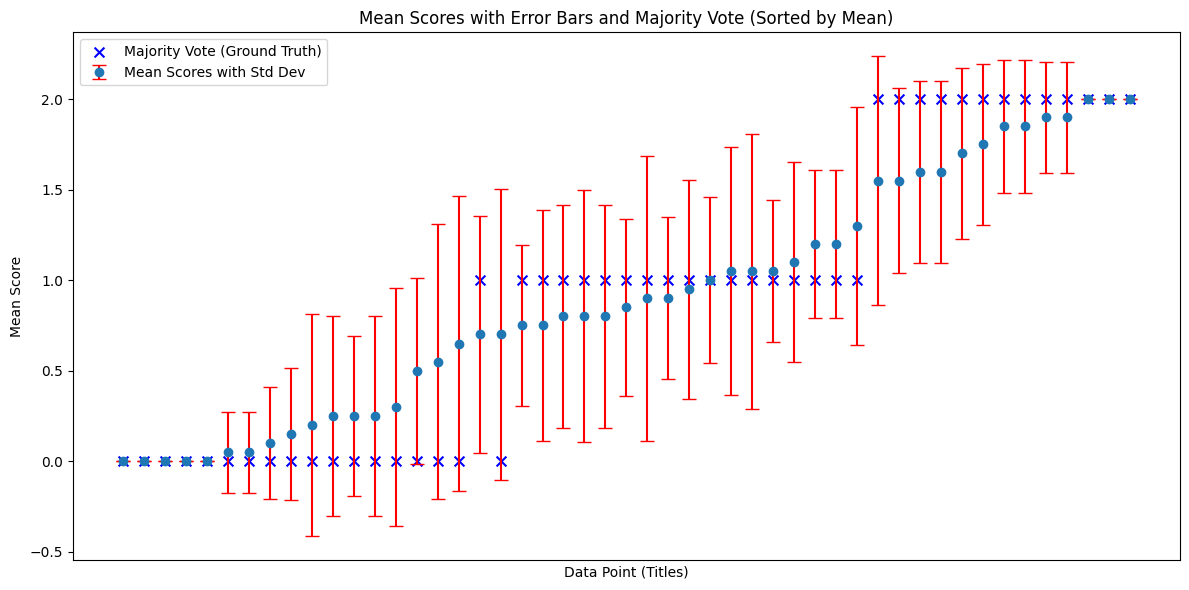

In [10]:
import numpy as np

# Compute mean and standard deviation for each data point
stats_data = melted_data.groupby(melted_data.columns[0])['Score'].agg(['mean', 'std']).reset_index()

# Compute the majority vote (mode) for each data point
majority_vote = melted_data.groupby(melted_data.columns[0])['Score'].agg(lambda x: x.mode()[0]).reset_index()
majority_vote.columns = [melted_data.columns[0], 'Majority Vote']

# Merge majority vote with stats_data
stats_data = stats_data.merge(majority_vote, on=melted_data.columns[0])

# Sort stats_data by mean scores
stats_data_sorted = stats_data.sort_values(by='mean', ascending=True)

# Error bar plot with majority vote as ground truth
plt.figure(figsize=(12, 6))
plt.errorbar(
    stats_data_sorted[melted_data.columns[0]],
    stats_data_sorted['mean'],
    yerr=stats_data_sorted['std'],
    fmt='o',
    ecolor='r',
    capsize=5,
    label='Mean Scores with Std Dev'
)

# Overlay majority-voted scores
plt.scatter(
    stats_data_sorted[melted_data.columns[0]],
    stats_data_sorted['Majority Vote'],
    color='blue',
    marker='x',
    s=50,
    label='Majority Vote (Ground Truth)'
)

plt.xticks([], [])
plt.title('Mean Scores with Error Bars and Majority Vote (Sorted by Mean)')
plt.xlabel('Data Point (Titles)')
plt.ylabel('Mean Score')
plt.legend()
plt.tight_layout()
plt.show()


In [11]:
file_path = '../llama_consistency_logs/llama_scores_2.csv'
scores = pd.read_csv(file_path)

# Extract title and seed scores
titles = scores.iloc[:, 0]  # First column (Titles)
seed_scores = scores.iloc[:, 1:]  # All other columns (Scores)

# Calculate the standard deviation across seeds for each data point
scores_std = seed_scores.std(axis=1)

# Add standard deviation as a new column to the dataframe
scores['Score Std Dev'] = scores_std

# Compute mean and max standard deviation
mean_std_dev = scores_std.mean()
max_std_dev = scores_std.max()

print(f"Mean Standard Deviation: {mean_std_dev}")
print(f"Maximum Standard Deviation: {max_std_dev}")



Mean Standard Deviation: 0.44110652767731623
Maximum Standard Deviation: 0.812727700887249


In [ ]:
z

In [12]:
# Example: Compute majority vote for each data point
majority_vote = seed_scores.mode(axis=1)[0]

# Calculate seed accuracy against majority vote
seed_accuracies = {}
for seed in seed_scores.columns:
    seed_accuracies[seed] = (seed_scores[seed] == majority_vote).mean()

# Convert to DataFrame for analysis
seed_accuracies_df = pd.DataFrame(list(seed_accuracies.items()), columns=['Seed', 'Accuracy'])
seed_accuracies_df.sort_values(by='Accuracy', ascending=False, inplace=True)

print("Seed Accuracies:")
print(seed_accuracies_df)


Seed Accuracies:
      Seed  Accuracy
2    11878  0.836735
3   659957  0.836735
14  998553  0.836735
1      123  0.836735
0       42  0.816327
9   332104  0.816327
5   662817  0.816327
6   704703  0.775510
10  520166  0.755102
8   668517  0.755102
19   39517  0.755102
12  439967  0.734694
13  259183  0.734694
4   826888  0.734694
7    68962  0.693878
11  995273  0.693878
16  916101  0.693878
17  434022  0.673469
18  135613  0.612245
15  283205  0.591837



Category Distribution Per Paper:
    Score_0  Score_1  Score_2
0       0.0     16.0      4.0
1       4.0     13.0      3.0
2       7.0     11.0      2.0
3      16.0      2.0      2.0
4       5.0      9.0      6.0
5       2.0      5.0     13.0
6      18.0      2.0      0.0
7      19.0      1.0      0.0
8      10.0      6.0      4.0
9       0.0      8.0     12.0
10     19.0      1.0      0.0
11      0.0      0.0     20.0
12      2.0     10.0      8.0
13      0.0      0.0     20.0
14     16.0      3.0      1.0
15      3.0     16.0      1.0
16      0.0      6.0     14.0
17     20.0      0.0      0.0
18     20.0      0.0      0.0
19      0.0      8.0     12.0
20      0.0      5.0     15.0
21      7.0      8.0      5.0
22     16.0      3.0      1.0
23     17.0      3.0      0.0
24      0.0      9.0     11.0
25      0.0      0.0     20.0
26      2.0     16.0      2.0
27      4.0     11.0      5.0
28      2.0     14.0      4.0
29     11.0      5.0      4.0
30     10.0     10.0      0.0
31    

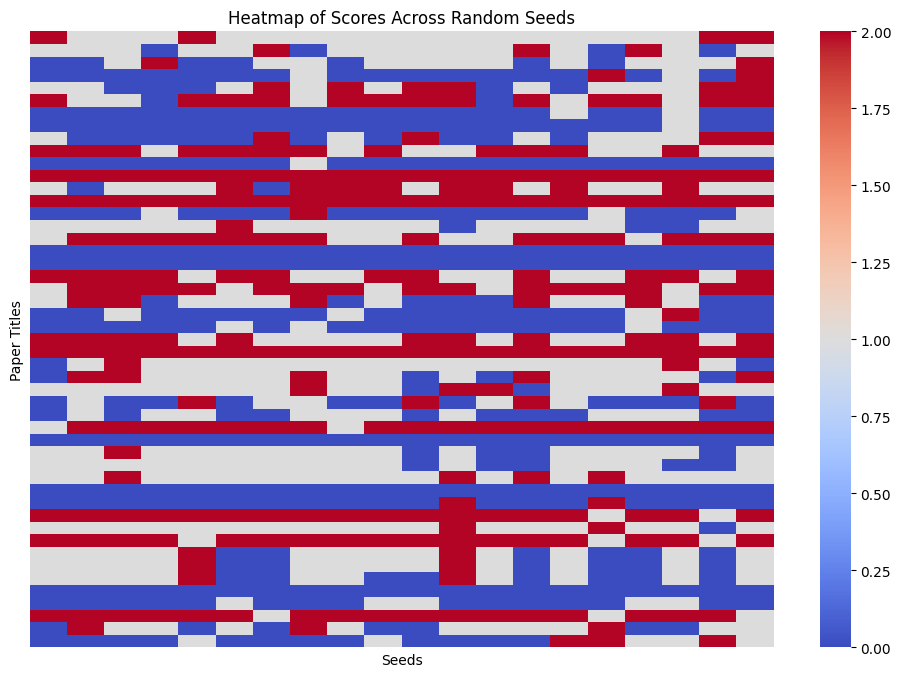

In [13]:
file_path = '../llama_consistency_logs/llama_scores_2.csv'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv(file_path)

# Extract titles and scores
titles = data.iloc[:, 0]  
scores = data.iloc[:, 1:]  

# 1. Category Distribution per Paper
category_counts = scores.apply(lambda row: row.value_counts(), axis=1).fillna(0)
category_counts.columns = [f"Score_{int(col)}" for col in category_counts.columns]
print("\nCategory Distribution Per Paper:")
print(category_counts)

# 2. Majority Score
mode_scores = scores.mode(axis=1)[0]  # Extract mode for each row (paper)
agreement_with_mode = scores.apply(lambda row: (row == mode_scores[row.name]).mean(), axis=1)

print("\nMajority Score and Agreement:")
majority_stats = pd.DataFrame({
    'Title': titles,
    'Majority Score': mode_scores,
    'Agreement with Majority (%)': agreement_with_mode * 100
})
print(majority_stats)


# 3. Transition Patterns
transitions = scores.apply(lambda row: row.diff().fillna(0).abs().sum(), axis=1)
print("\nTransition Patterns (Sum of Absolute Score Changes):")
transition_stats = pd.DataFrame({
    'Title': titles,
    'Score Transitions': transitions
})
print(transition_stats)

# 4. Heatmap Visualization
plt.figure(figsize=(12, 8))
sns.heatmap(scores, cmap="coolwarm", annot=False, cbar=True, xticklabels=False, yticklabels=False)
plt.title("Heatmap of Scores Across Random Seeds")
plt.xlabel("Seeds")
plt.ylabel("Paper Titles")
plt.show()



In [14]:
from statsmodels.stats.inter_rater import fleiss_kappa
import numpy as np

# Prepare the data for Fleiss' Kappa: count how often each score (0, 1, 2) appears for each paper across all seeds
score_counts = scores.apply(lambda row: [sum(row == 0), sum(row == 1), sum(row == 2)], axis=1)

score_counts_array = np.array(score_counts.tolist(), dtype=int)

fleiss_kappa_value = fleiss_kappa(score_counts_array)
print(f"Fleiss' Kappa Score: {fleiss_kappa_value}") # moderately consistent 


Fleiss' Kappa Score: 0.4577995413670017


In [15]:
transitions.mean()

7.653061224489796

In [23]:
### Consistency input data creation

import json
import pandas as pd

# read json 
with open("../llama_outputs_CD000017_log_p1.json") as f:
    data = json.load(f)

title_dict = {}

for entry in data:
    seed = entry['seed']
    llama_output = entry.get('llama_output', {})
    paper_list = llama_output.get('paper_list', {})
    
    # Process each title and store relevance scores with seeds
    for title, details in paper_list.items():
        if title not in title_dict:
            title_dict[title] = {}
        title_dict[title][seed] = details.get('relevance', 0)

df = pd.DataFrame.from_dict(title_dict, orient='index').reset_index()

df.rename(columns={'index': 'title'}, inplace=True)


df

,title,42,123,11878,659957,826888,662817,704703,68962,668517,...,520166,995273,439967,259183,998553,283205,916101,434022,135613,39517
0,1. Repeated Exercise Induces Release of Solubl...,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0
1,2. Should Claudicants Receive Angioplasty or E...,1.0,1.0,1.0,0.0,1.0,1.0,2.0,0.0,1.0,...,1.0,1.0,1.0,2.0,1.0,0.0,2.0,1.0,0.0,1.0
2,3. Intermittent claudication should not be tre...,0.0,0.0,1.0,2.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0
3,1. Should Claudicants Receive Angioplasty or J...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,NaN,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
4,2. Angioplasty (versus non surgical management...,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0
5,1. Exercise and nursing therapy for patients w...,0.0,NaN,0.0,NaN,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,NaN,1.0,0.0,NaN,0.0
6,2. Treatment of intermittent claudication with...,0.0,NaN,0.0,NaN,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0
7,3. Outcome of femoropopliteal angioplasty,2.0,NaN,2.0,NaN,2.0,2.0,2.0,1.0,2.0,...,2.0,2.0,2.0,1.0,2.0,NaN,2.0,2.0,NaN,1.0
8,4. Outcome of the first 100 femoropopliteal an...,2.0,NaN,1.0,NaN,2.0,2.0,2.0,1.0,2.0,...,2.0,1.0,2.0,1.0,2.0,NaN,2.0,2.0,NaN,1.0
9,1. Exercise and nursing therapy for patients w...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN


In [24]:
df.to_csv('CD000017_p1.csv', index=False)
